In [2]:
import importlib
from binja_jupyter import *

In [3]:
import os
import binaryninja
from binaryninja.enums import *
fpath = os.path.join(os.environ['HOME'], 'repos/lwerdna/workbench/testbins/tests-macos-x64-macho')

In [4]:
bv = binaryninja.open_view(fpath)
func = bv.get_functions_by_name('_loop0')[0]

In [10]:
import importlib
importlib.reload(binja_jupyter)

NameError: name 'binja_jupyter' is not defined

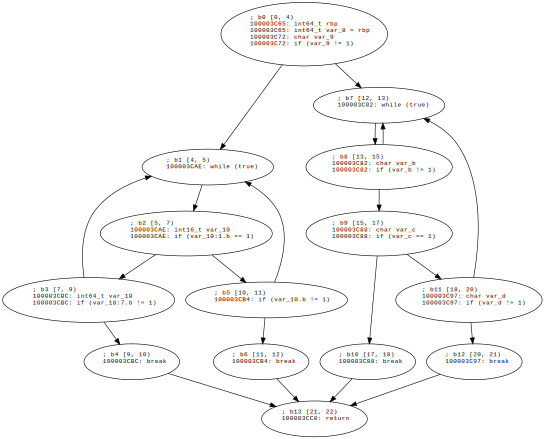

In [7]:
func = bv.get_functions_by_name('_dream_cfg')[0]

draw_basic_blocks_full(func.hlil)

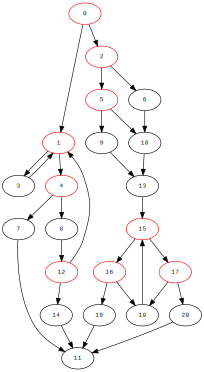

In [6]:
# GRAPH THE DREAM CFG, HIGHLIGHTING CONDITIONAL NODES

func = bv.get_functions_by_name('_dream_cfg')[0]

G = bn2nx(func)
#G[a,b]
bb = func.llil.basic_blocks[0]
reds = [bb for bb in func.llil.basic_blocks if bb[-1].operation == LowLevelILOperation.LLIL_IF]
draw_basic_blocks_min(func.llil, reds)

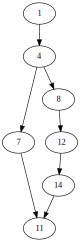

In [8]:
llil = func.llil
G = cfg_slice(llil, llil.basic_blocks[1], llil.basic_blocks[11])
draw_networkx(G)

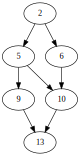

In [9]:
G = cfg_slice(llil, llil.basic_blocks[2], llil.basic_blocks[13])
draw_networkx(G)